# BY S A HARIPRASAD
# 18BCE0686  A2 SLOT SOCIAL AND INFORMATION NETWORK

In [1]:
! pip install networkx

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from collections import defaultdict
import random
import time
import networkx as nx

In [3]:
def read_data(graph_file): 
    f1 = open(graph_file, 'r')
    first_line = f1.readline().split() 
    novert = int(first_line[0]) 
    noedge = int(first_line[1]) 
    graph = defaultdict(dict) 
    outdeg = defaultdict(int)
    for line in f1.readlines(): 
        data = line.split() 
        outdeg[int(data[0])] += 1 
        if float(data[2])>0:
            graph[int(data[0])][int(data[1])] ={'weight': float(data[2])} 
        elif float(data[2])<0:
            graph[int(data[0])][int(data[1])] ={'weight': -1*float(data[2])} 
    return novert, noedge, graph, outdeg

In [4]:
#done
def ICpropmodel(graph, seeds): 
    inf = seeds[:]
    qu = inf[:]
    while len(qu) != 0: 
        node = qu.pop(0)
        for element in graph[node]: 
            if element not in inf:
                probility = random.random()
                if probility <= graph[node][element]['weight']: 
                    inf.append(element)
                    qu.append(element) 
    noofinfl = len(inf) 
    return noofinfl

In [5]:

def LTpropmodel(graph, seeds): 
    inf = seeds[:]
    qu = inf[:]
    pre_node_record = defaultdict(float)
    threshold = defaultdict(float)
    while len(qu) != 0: 
        node = qu.pop(0)
        for element in graph[node]: 
            if element not in inf:
                if threshold[element] == 0: 
                    threshold[element] = random.random()
                pre_node_record[element] = pre_node_record[element] + graph[node][element]['weight'] 
                if  pre_node_record[element] >= threshold[element]:
                    inf.append(element) 
                    qu.append(element)
    noofinfl = len(inf) 
    return noofinfl

In [6]:
SN_INFLUENCE_PER = 0.4
CENTRALITY_PER = 0.4
def propic(graph, novert, seed_size, outdeg):
    test_count = 0
    seeds = []
    s_n_influnece = defaultdict(float)
    G=graph
    if G.is_directed():
        s = 1.0 / (len(G) - 1.0)
        degreecentrality = {n: d * s for n, d in G.out_degree()}
        G = G.reverse()
    else:
        s = 1.0 / (len(G) - 1.0)
        degreecentrality = {n: d * s for n, d in G.degree()}
    path_length = nx.single_source_shortest_path_length
    nodes = G.nodes
    closeness_centrality = {}
    for n in nodes:
        sp = dict(path_length(G, n))
        totsp = sum(sp.values())
        if totsp > 0.0 and len(G) > 1: 
            closeness_centrality[n] = (len(sp) - 1.0) / totsp
            s = (len(sp) - 1.0) / (len(G) - 1)
            closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0
    while len(seeds) < seed_size:
        if len(seeds) == 0:
            for node in range(1, novert + 1):
                s_n_influnece[node] = 0
                if node in outdeg.keys():
                    s_n_influnece[node] = (s_n_influnece[node] + ICpropmodel(graph, seeds+[node]))/novert
                    if not closeness_centrality[node]==0:
                        s_n_influnece[node]=s_n_influnece[node]*SN_INFLUENCE_PER+(1/closeness_centrality[node])*CENTRALITY_PER+degreecentrality[node]*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))
                    else:
                        s_n_influnece[node]=s_n_influnece[node]*SN_INFLUENCE_PER+(0)*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))+degreecentrality[node]*CENTRALITY_PER
            max_seed = max(s_n_influnece, key=s_n_influnece.get)
            s_n_influnece.pop(max_seed)
            seeds.append(max_seed) 
            test_count+=1
        elif len(seeds)!= 0:
            prev_best = max(s_n_influnece, key=s_n_influnece.get)
            s_n_influnece[prev_best] = 0
            marginal_profit = ICpropmodel(graph, seeds + [prev_best]) - ICpropmodel(graph, seeds)
            s_n_influnece[prev_best] += marginal_profit
            if not closeness_centrality[prev_best]==0:
                s_n_influnece[prev_best]=s_n_influnece[prev_best]*SN_INFLUENCE_PER+(1/closeness_centrality[prev_best])*CENTRALITY_PER+degreecentrality[prev_best]*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))
            else:
                s_n_influnece[prev_best]=s_n_influnece[prev_best]*SN_INFLUENCE_PER+(0)*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))+degreecentrality[prev_best]*CENTRALITY_PER
            current_seed = max(s_n_influnece, key=s_n_influnece.get)
            if current_seed == prev_best:
                seeds.append(current_seed)
                s_n_influnece.pop(current_seed)
            else:
                continue
    return seeds





In [7]:
SN_INFLUENCE_PER = 0.4
CENTRALITY_PER = 0.4
def proplt(graph, novert, seed_size, outdeg):
    seeds = []
    s_n_influnece = defaultdict(float)
    G=graph
    if G.is_directed():
        s = 1.0 / (len(G) - 1.0)
        degreecentrality = {n: d * s for n, d in G.out_degree()}
        G = G.reverse()
    else:
        s = 1.0 / (len(G) - 1.0)
        degreecentrality = {n: d * s for n, d in G.degree()}
    path_length = nx.single_source_shortest_path_length 
    nodes = G.nodes
    closeness_centrality = {}
    for n in nodes:
        sp = dict(path_length(G, n))
        totsp = sum(sp.values())
        if totsp > 0.0 and len(G) > 1:
            closeness_centrality[n] = (len(sp) - 1.0) / totsp
            s = (len(sp) - 1.0) / (len(G) - 1)
            closeness_centrality[n] *= s
        else:
            closeness_centrality[n] = 0.0
    while len(seeds) < seed_size:
        if len(seeds) == 0:
            for node in range(1, novert + 1):
                s_n_influnece[node] = 0
                if node in outdeg:
                    single_node = []
                    single_node.append(node)
                    s_n_influnece[node]=( s_n_influnece[node] + LTpropmodel(graph, single_node))/novert
                    if not closeness_centrality[node]==0:
                        s_n_influnece[node]=s_n_influnece[node]*SN_INFLUENCE_PER+(1/closeness_centrality[node])*CENTRALITY_PER+degreecentrality[node]*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))
                    else:
                        s_n_influnece[node]=s_n_influnece[node]*SN_INFLUENCE_PER+(0)*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))+degreecentrality[node]*CENTRALITY_PER
            max_seed = max(s_n_influnece, key=s_n_influnece.get)
            s_n_influnece.pop(max_seed)
            seeds.append(max_seed)
        else:
            prev_best = max(s_n_influnece, key=s_n_influnece.get)
            s_n_influnece[prev_best] = 0
            new_seeds = seeds + [prev_best]
            marginal_profit = LTpropmodel(graph, new_seeds) - LTpropmodel(graph, seeds)
            s_n_influnece[prev_best] = s_n_influnece[prev_best] + marginal_profit
            if not closeness_centrality[prev_best]==0:
                s_n_influnece[prev_best]=s_n_influnece[prev_best]*SN_INFLUENCE_PER+(1/closeness_centrality[prev_best])*CENTRALITY_PER+degreecentrality[prev_best]*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))
            else:
                s_n_influnece[prev_best]=s_n_influnece[prev_best]*SN_INFLUENCE_PER+(0)*(1-(CENTRALITY_PER+SN_INFLUENCE_PER))+degreecentrality[prev_best]*CENTRALITY_PER
            current_seed = max(s_n_influnece, key=s_n_influnece.get)
            if current_seed == prev_best:
                seeds.append(current_seed)
                s_n_influnece.pop(current_seed)
            else:
                continue
    return seeds

In [8]:
def inffind(graph, novert, seed_size, outdeg, model): 
    if model == "IC":
        seeds = propic(graph, novert, seed_size, outdeg) 
    else:
        seeds = proplt(graph, novert, seed_size, outdeg) 
    return seeds

In [9]:
def calculate_average(graph, seeds, model): 
    if model == "IC":
        count = 0
        total_influence = 0 
        while count < 1000:
            total_influence += ICpropmodel(graph, seeds) 
            count += 1
        IC_average = total_influence/count 
        average_result = IC_average
    else:
        count = 0
        total_influence = 0 
        while count < 1000:
            total_influence += LTpropmodel(graph, seeds) 
            count += 1
        LT_average = total_influence / count 
        average_result = LT_average
    return average_result


In [10]:
def getseeds(G, novert, seed_size, outdeg, model): 
    final_seeds = []
    total_influence = 0
    final_seeds = inffind(G, novert, seed_size, outdeg, model) 
    total_influence = calculate_average(G, final_seeds, model)
    print("Hence the seeds selected for highest influence are\n ", final_seeds)


1-graph from text file 
 2-random graph 
2
enter the number of vertices for Erdos-Renghi graph: 50
enter the probability for node establishment: 0.1
251
enter the no of seeds required: 10
Propagation models:
IC - INDEPENDENT CASCADE
LT - LINEAR THRESHOLD
enter: IC
('Hence the seeds selected for highest influence are\n ', [12, 23, 14, 13, 1, 22, 28, 32, 33, 38])
('execution time = ', 0.2952091693878174, 's')


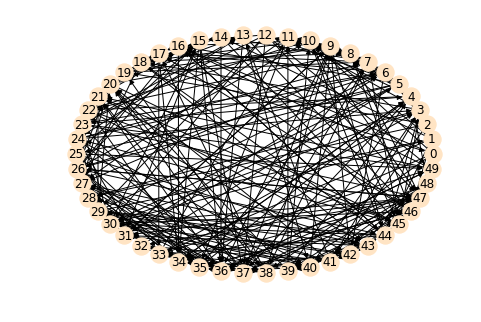

In [14]:
choice = int(input('1-graph from text file \n 2-random graph \n')) 
if choice==1:
    graph_file=raw_input('enter the name/directory of thefile: ') 
    novert, noedge, graph, outdeg =read_data(graph_file) 
#     print(novert)
#     print(noedge)
#     print(graph.items())
    print(outdeg)
    G = nx.DiGraph()
    G.add_nodes_from(graph)
    G.add_edges_from(((u, v, data)for u, nbrs in graph.items()for v, data in nbrs.items()))
elif choice==2:
    novert=int(input('enter the number of vertices for Erdos-Renghi graph: '))
    prob=float(input('enter the probability for node establishment: '))
    G=nx.fast_gnp_random_graph(novert, prob, seed=None, directed=True)
    noedge=nx.number_of_edges(G)
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] =random.random()
    outdeg={}
    for i in G.nodes():
        outdeg[i]=G.out_degree(i)
    print(noedge)
seed_size=int(input('enter the no of seeds required: '))
model=raw_input('Propagation models:\nIC - INDEPENDENT CASCADE\nLT - LINEAR THRESHOLD\nenter: ')
start_time = time.time()
getseeds(G, novert, seed_size, outdeg, model)
print("execution time = ",time.time() - start_time,"s")  
nx.draw_circular(G, node_color = 'bisque', with_labels = True)
